# Punkte und Oberflächen konvertieren
In diesem Notebook werden wir Punkte von einer Oberfläche absampling und die Punktwolke wieder in eine Oberfläche umwandeln.

In [1]:
import napari_process_points_and_surfaces as nppas
import vedo
import napari

In [2]:
viewer = napari.Viewer(ndisplay=3)

def hide_all(viewer):
    for layer in viewer.layers:
        layer.visible = False
        
def show_all(viewer):
    for layer in viewer.layers:
        layer.visible = True

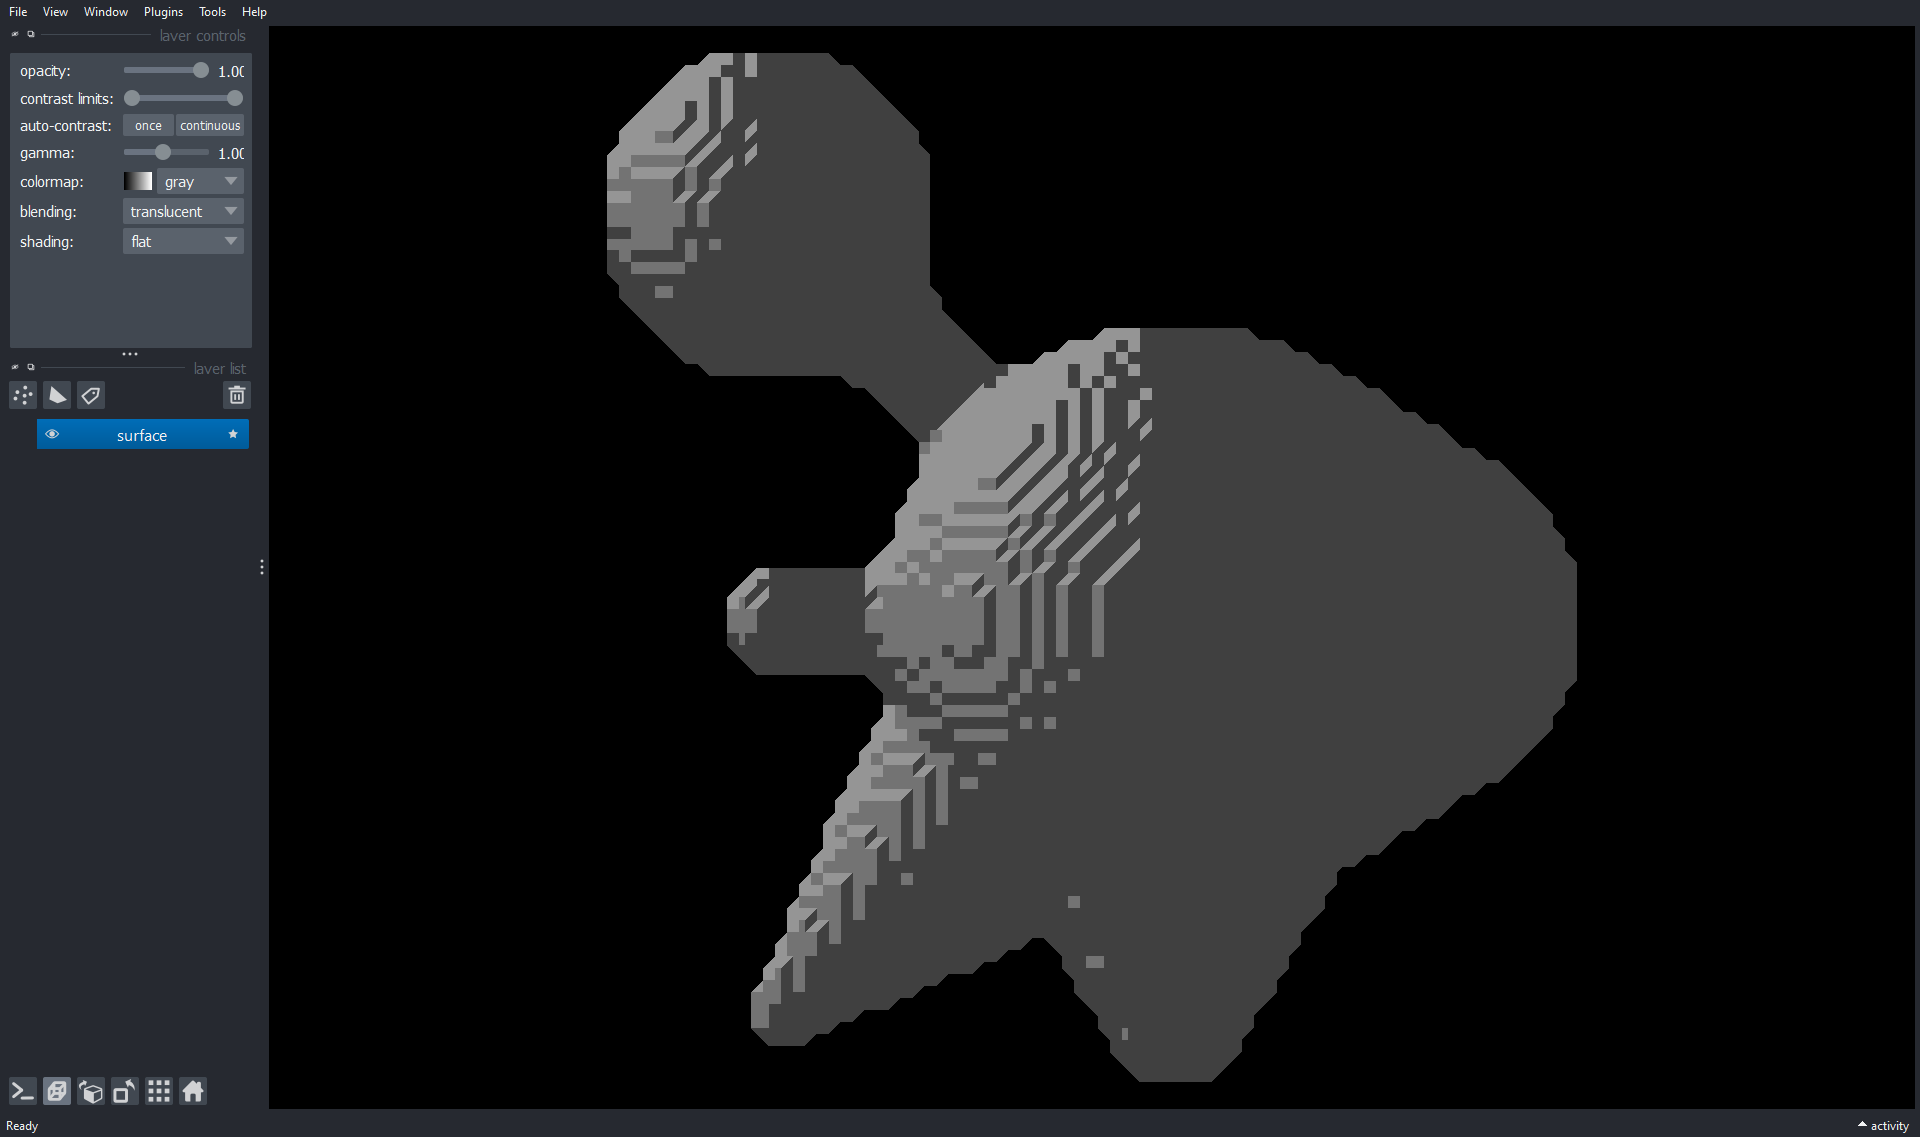

In [3]:
mesh = vedo.load("../../data/branchoid.ply")
surface = nppas.to_napari_surface_data(mesh)

surface_layer = viewer.add_surface(surface)

napari.utils.nbscreenshot(viewer)

## Punktwolken erstellen
Wir können eine Punktwolke aus der Oberfläche erstellen. Die Punkte befinden sich auf der Oberfläche und nicht im Inneren des Volumens.

In [4]:
point_cloud = nppas.sample_points_from_surface(surface, distance_fraction=0.01)
point_cloud

array([[26. , 44. , 46.5],
       [26. , 43.5, 48. ],
       [26. , 43.5, 50. ],
       ...,
       [74.5, 55. , 52. ],
       [74.5, 56. , 49. ],
       [74.5, 56. , 51. ]], dtype=float32)

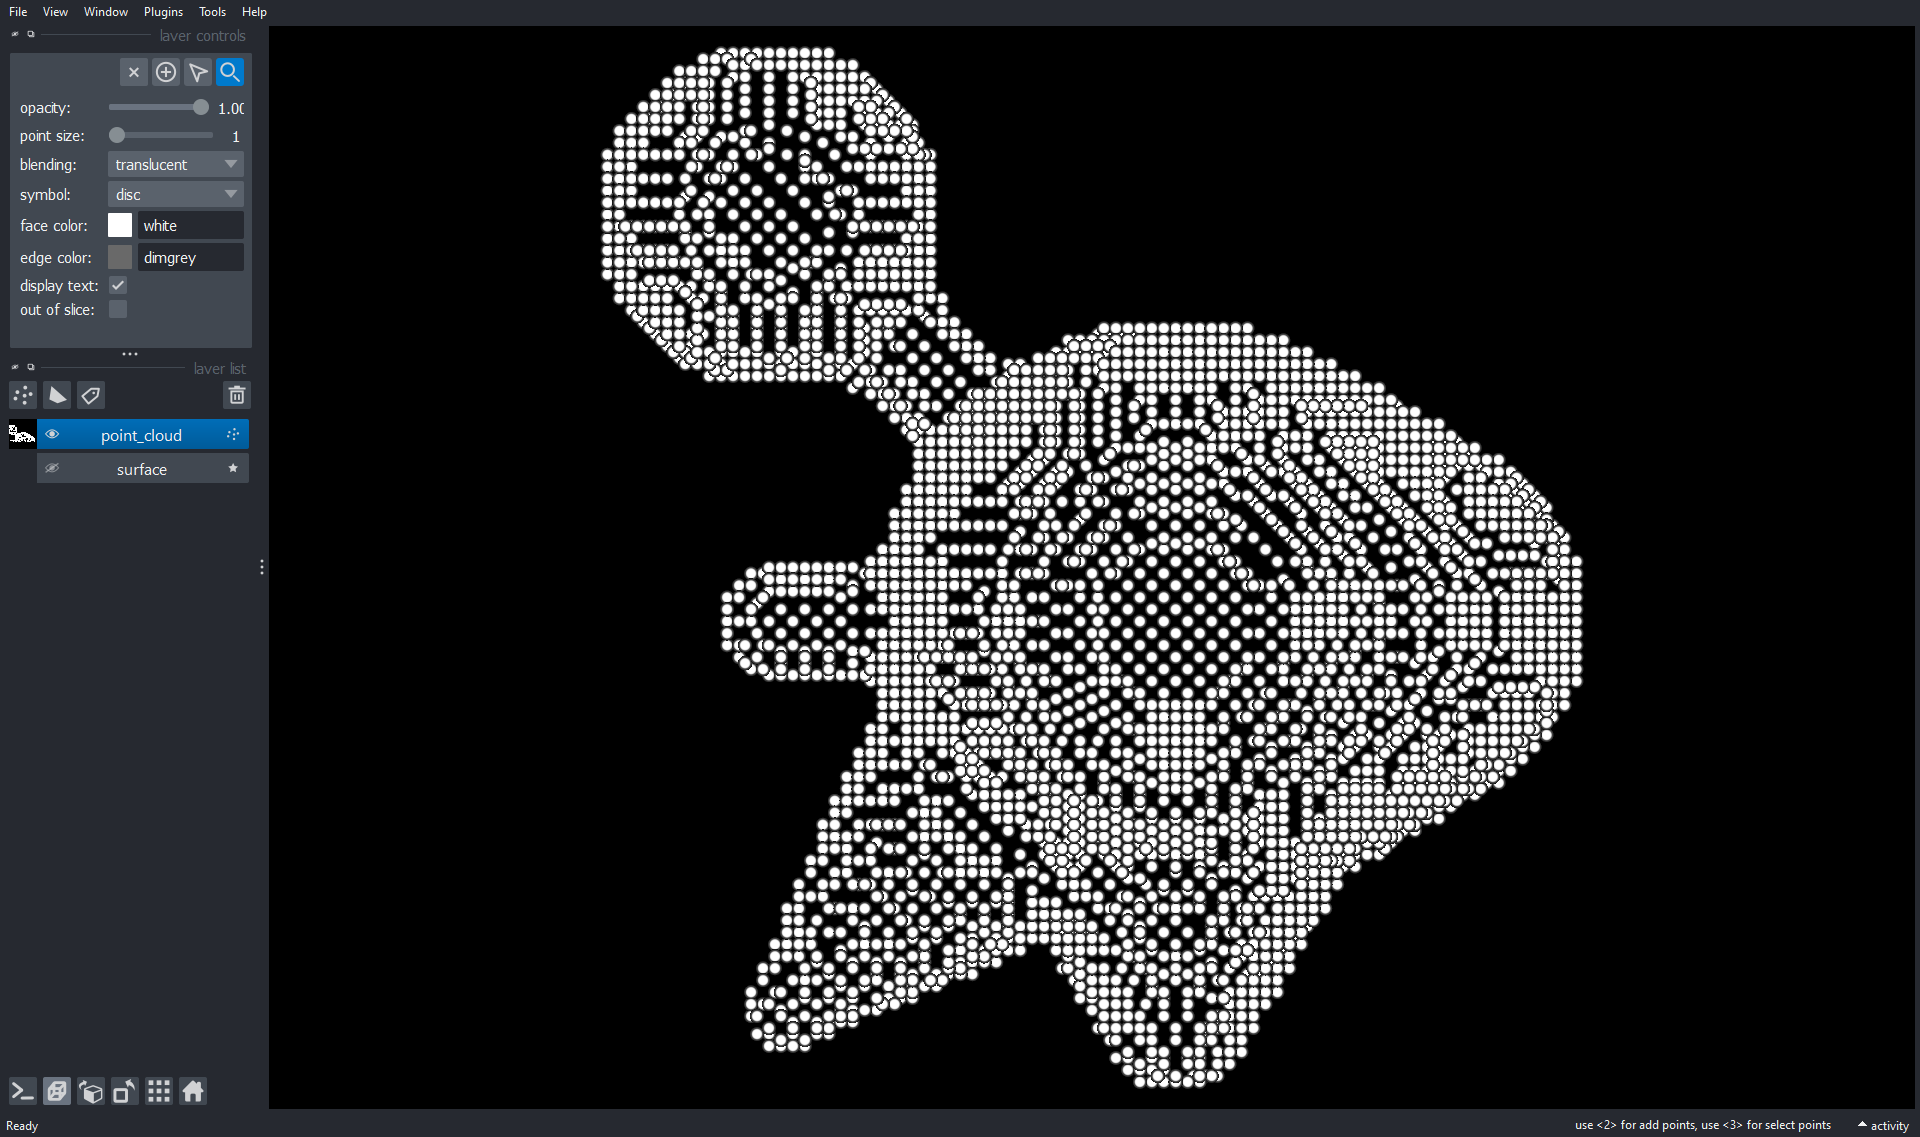

In [5]:
hide_all(viewer)

points_layer = viewer.add_points(point_cloud, size=1)

napari.utils.nbscreenshot(viewer)

Falls dies zu viele Punkte sind, können wir eine kleinere Anzahl von Punkten daraus auswählen.

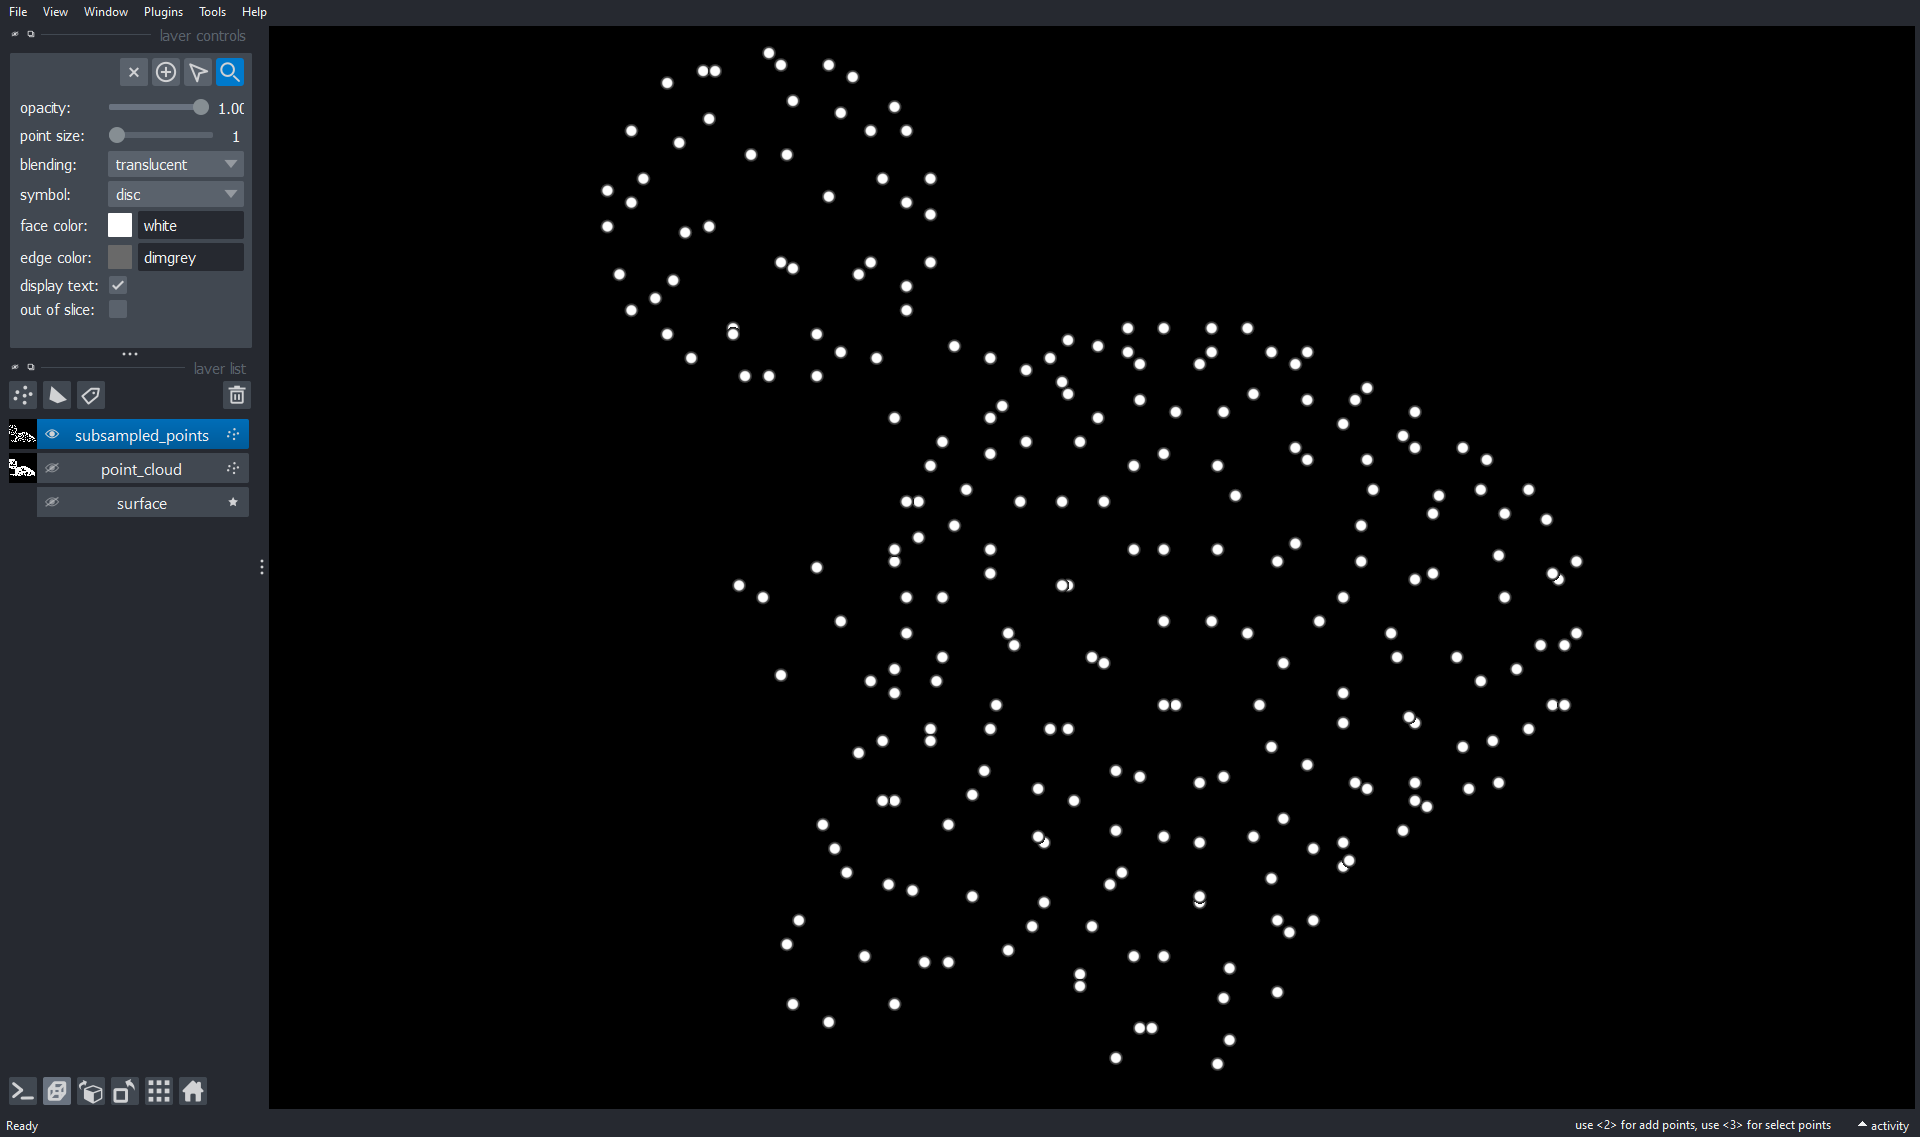

In [6]:
hide_all(viewer)
    
subsampled_points = nppas.subsample_points(point_cloud, distance_fraction=0.05)

viewer.add_points(subsampled_points, size=1)

napari.utils.nbscreenshot(viewer)

## Punkte in Oberflächen umwandeln

Wir können Oberflächen aus Punktwolken rekonstruieren. Offensichtlich könnte es zu einem Informationsverlust gekommen sein, abhängig davon, was wir mit den Punkten gemacht haben.

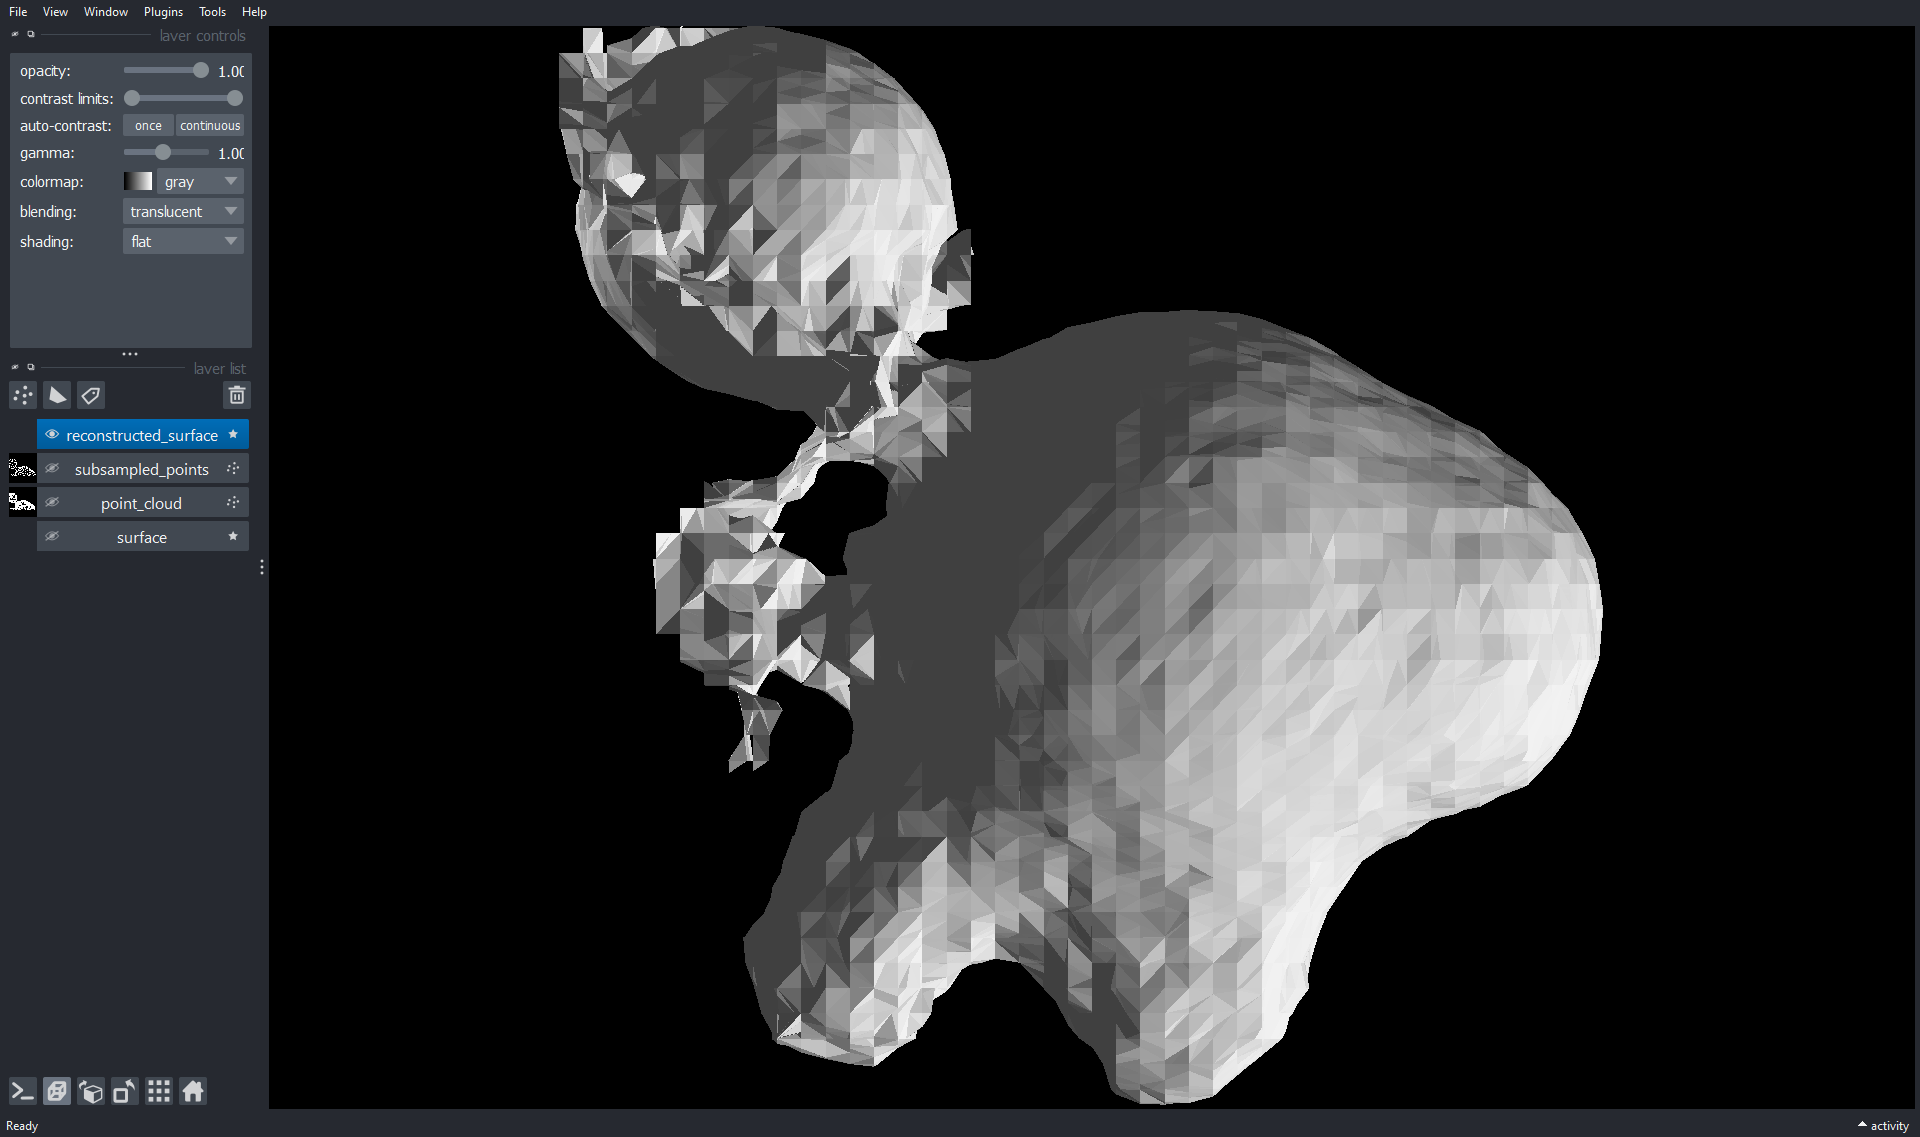

In [7]:
hide_all(viewer)

reconstructed_surface = nppas.reconstruct_surface_from_pointcloud(
    subsampled_points, 
    number_of_sampling_voxels=15, 
    point_influence_radius=10)

viewer.add_surface(reconstructed_surface)

napari.utils.nbscreenshot(viewer)

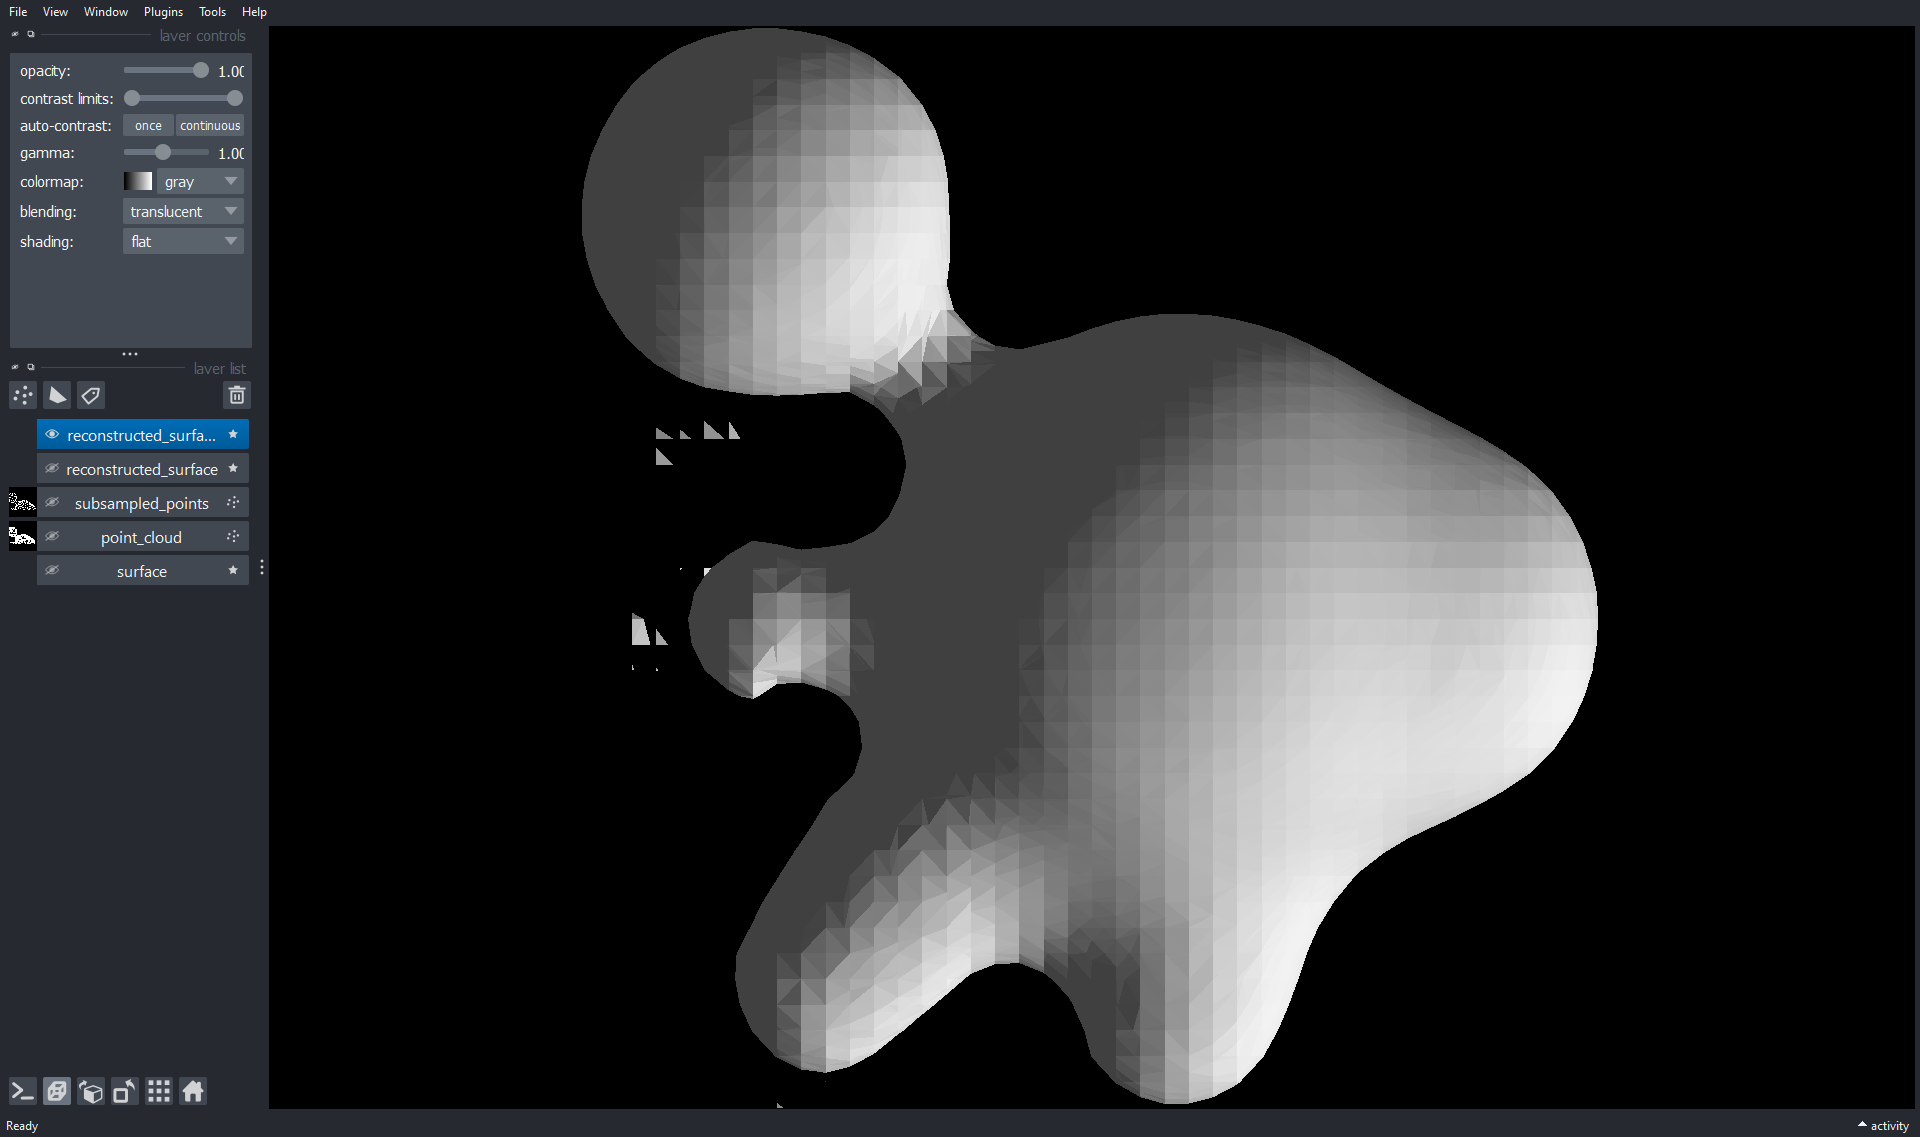

In [8]:
hide_all(viewer)

reconstructed_surface = nppas.reconstruct_surface_from_pointcloud(
    point_cloud, 
    number_of_sampling_voxels=15, 
    point_influence_radius=10)

viewer.add_surface(reconstructed_surface)

napari.utils.nbscreenshot(viewer)